# Homework 7 Solutions

## FINM 36700 - 2023

### UChicago Financial Mathematics
* Mani Sawhney
* msawhn2@uchicago.edu





### Case: Grantham, Mayo, and Van Otterloo, 2012: Estimating the Equity Risk Premium) [9-211-051].

## 1) GMO

#### <i> This section is not graded, and you do not need to submit your answers. But you are expected to consider these issues and be ready to discuss them. </i>

## 1.1) GMO's approach

### 1.1.a) Why does GMO believe they can more easily predict long-run than short-run asset class performance?

- GMO believes investors demand risk premia over the long run in stocks as stocks tend to lose money at "bad times". 


- Views markets as a "voting machine" in the short run, influenced by sentiments, trends, and behavioral factors.


- In the long run, perceives markets as a "waiting machine," where fundamental values prevail, allowing for strategic decision-making.


- GMO also believes since market prices could significantly deviate away from fundamental value in short run, the expected returns in short term could differ from the long run estimates.<br><br>

- This led GMO to believe that near term expected returns were noisy and that they can more easily predict long-run than short-run asset class performance.

### 1.1.b) What predicting variables does the case mention are used by GMO? Does this fit with the goal of long-run forecasts?

- GMO uses dividend yield estimates that investors were likely to require over the long run and the expected long-run dividend growth rate. <br><br>

- They employed the "Gordon Growth Model", which posits that long-run required return on stocks was the sum of fair dividend yield, required by the investors and expected long-run dividend growth.

<center> $R^{*} = \frac{D_{1}}{P_{0}^{*} + G}$

### 1.1.c) How has this approach led to contrarian positions?

- GMO though that prices could deviate from fundamental value, particularly at the level of broad asset classes such as U.S. stocks. <br><br>

- The believed that the prices would revert to fundamental value over time.<br><br>

- When the market has an overly optimistic view of future dividend, prices would exceed fair value. Investors would then eventually realize they were too optimistic and that prices would rever toward fair value.<br><br>

- Thus at times of high prices GMO would have a contrarian view of expected returns being low.<br><br>

### 1.1.d) How does this approach raise business risk and managerial career risk?

- GMO's contrarian approach would create business or managerial risk, if stocks do not revert to their fundamental value. <br><br>

- For example- GMO turned very bearish on US stocks in 1997 and underweighted Stocks in their asset allocation funds. As U.S. stocks soared between 1997 and 2000, GMO's asset allocation underperformed severly and they lost nearly 60% of their assets to withdrawls. <br><br>

- Thus their contrarian trades could lead to heavy risks in case the prices fail to revert to their fundamental levels in the time span estimated by GMO.

## 1.2) Market Environment

### 1.2.a) We often estimate the market risk premium by looking at a large sample of historic data. What reasons does the case give to be skeptical that the market risk premium will be as high in the future as it has been over the past 50 years?

- GMO had a "dim" outlook for stocks in 2012, even though valuations had fallen from their 1999 peak. <br><br>

- GMO believed these valuations were still high by historical standards. After the 2008 drop, the price-earnings ratio on S&P 500 stood at 19.9 which was above its long-run average of 16. <br><br>

- GMO was sceptical that US firms could sustain the record profit margins they had delivered since 2009. They were further pessimistic about future earnings growth. <br><br>

- GMO still believed that stocks would continue to earn a healthy risk premium over the long run.

### 1.2.b) In 2007, GMO forecasts real excess equity returns will be negative. What are the biggest drivers of their pessimistic conditional forecast relative to the unconditional forecast. (See Exhibit 9.) 

- $\% \Delta(\frac{P}{E})$ or Expansion or Contraction multiple was estimated to be negative (-2.8%) for the 7 year forecast compared to 0% in the unconditional "steady state" forecast. <br><br>



- $\% \Delta(\frac{E}{S})$ or Profit Margin was similarly estimated to be negative (-3.9%) for the 7 year forecast compared to 0% in the unconditional "steady state" forecast. <br><br>

- These were the biggest drivers of the pessimistic conditional forecast.

### 1.2.c) In the 2011 forecast, what components has GMO revised most relative to 2007? Now how does their conditional forecast compare to the unconditional? (See Exhibit 10.)

- $\% \Delta(\frac{P}{E})$ or Expansion or Contraction multiple was upgraded from -2.8% in 2007 to 0.0% in 2011 causing the positive estimate in stock returns.<br><br>

- $\% \Delta(S)$ or Real Sales Growth per share was upgraded from 2.4% in 2007 to 2.9% in 2011 causing further addition to the positive estimate in stock returns.<br><br>

## 3. Consider the asset class forecasts in Exhibit 1.
### 1.3.a) Which asset class did GMO estimate to have a negative 10-year return over 2002-2011?<br><br>

- GMO estimated **US Equities** to have a negative 10-year return. <br><br>


### 1.3.b) Which asset classes substantially outperformed GMO's estimate over that time period?<br><br>


- **EM Equities** and **Foreign Government Debt** outperformed GMO's estimate by about 4% during this time.<br><br>

### 1.3.c) Which asset classes substantially underperformed GMO's estimate over that time period?<br><br>

- **US Treasury Bills**, which GMO estimated to have around 2% positive expected returns posted negative ~1% returns.<br><br>
- Similarly **US REITs** posted ~7% returns as compared to more than 11% estimated by GMO.<br><br>

## 4. Fund Performance.
### 1.4.a) In which asset class was GMWAX most heavily allocated throughout the majority of 1997-2011? <br><br>


-  Through most of the period GMWAX was most heavily allocated in **U.S. Fixed Income.** <br><br>


### 1.4.b) Comment on the performance of GMWAX versus its benchmark. (No calculation needed, simply comment on the comparison in the exhibits.) <br><Br>

-  The fund has been quite successful relative to the benchmark, with returns almost double the benchmark and a Sharpe ratio more than double. <br><br> 

- We don't have a long enough series of returns to do a more involved statistical analysis of the performance.

# Imports

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import kurtosis, skew
from scipy.stats import norm
import seaborn as sns
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS


from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.neural_network import MLPRegressor

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[15, 6]
import matplotlib.cm as cm

# Helper Functions

### Performance Summary Statistics

In [2]:
def performance_summary(return_data):
    """ 
        Returns the Performance Stats for given set of returns
        Inputs: 
            return_data - DataFrame with Date index and Monthly Returns for different assets/strategies.
        Output:
            summary_stats - DataFrame with annualized mean return, vol, sharpe ratio. Skewness, Excess Kurtosis, Var (0.5) and
                            CVaR (0.5) and drawdown based on monthly returns. 
    """
    summary_stats = return_data.mean().to_frame('Mean').apply(lambda x: x*12)
    summary_stats['Volatility'] = return_data.std().apply(lambda x: x*np.sqrt(12))
    summary_stats['Sharpe Ratio'] = summary_stats['Mean']/summary_stats['Volatility']
    
    summary_stats['Skewness'] = return_data.skew()
    summary_stats['Excess Kurtosis'] = return_data.kurtosis()
    summary_stats['VaR (0.05)'] = return_data.quantile(.05, axis = 0)
    summary_stats['CVaR (0.05)'] = return_data[return_data <= return_data.quantile(.05, axis = 0)].mean()
    summary_stats['Min'] = return_data.min()
    summary_stats['Max'] = return_data.max()
    
    wealth_index = 1000*(1+return_data).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks

    summary_stats['Max Drawdown'] = drawdowns.min()
    summary_stats['Peak'] = [previous_peaks[col][:drawdowns[col].idxmin()].idxmax() for col in previous_peaks.columns]
    summary_stats['Bottom'] = drawdowns.idxmin()
    
    recovery_date = []
    for col in wealth_index.columns:
        prev_max = previous_peaks[col][:drawdowns[col].idxmin()].max()
        recovery_wealth = pd.DataFrame([wealth_index[col][drawdowns[col].idxmin():]]).T
        recovery_date.append(recovery_wealth[recovery_wealth[col] >= prev_max].index.min())
    summary_stats['Recovery'] = recovery_date
    
    return summary_stats

### Time-series Regression

In [3]:
def time_series_regression(portfolio, factors, multiple_factors = False, resid = False):
    
    ff_report = pd.DataFrame(index=portfolio.columns)
    bm_residuals = pd.DataFrame(columns=portfolio.columns)

    rhs = sm.add_constant(factors)

    for portf in portfolio.columns:
        lhs = portfolio[portf]
        res = sm.OLS(lhs, rhs, missing='drop').fit()
        ff_report.loc[portf, 'alpha_hat'] = res.params['const'] * 12
        if multiple_factors:
            ff_report.loc[portf, factors.columns[0] + ' beta'] = res.params[1]
            ff_report.loc[portf, factors.columns[1]+ ' beta'] = res.params[2] 
            ff_report.loc[portf, factors.columns[2]+ ' beta'] = res.params[3]
        else:
            ff_report.loc[portf, factors.name + ' beta'] = res.params[1]

            
        ff_report.loc[portf, 'info_ratio'] = np.sqrt(12) * res.params['const'] / res.resid.std()
        ff_report.loc[portf, 'treynor_ratio'] = 12 * portfolio[portf].mean() / res.params[1]
        ff_report.loc[portf, 'R-squared'] = res.rsquared
        ff_report.loc[portf, 'Tracking Error'] = (res.resid.std()*np.sqrt(12))

        if resid:
            bm_residuals[portf] = res.resid
            
            
        
    if resid:
        return bm_residuals
        
    return ff_report

### Tangency Weights

In [4]:
def tangency_weights(returns, cov_mat = 1):
    
    if cov_mat ==1:
        cov_inv = np.linalg.inv((returns.cov()*12))
    else:
        cov = returns.cov()
        covmat_diag = np.diag(np.diag((cov)))
        covmat = cov_mat * cov + (1-cov_mat) * covmat_diag
        cov_inv = np.linalg.inv((covmat*12))  
        
    ones = np.ones(returns.columns[1:].shape) 
    mu = returns.mean()*12
    scaling = 1/(np.transpose(ones) @ cov_inv @ mu)
    tangent_return = scaling*(cov_inv @ mu) 
    tangency_wts = pd.DataFrame(index = returns.columns[1:], data = tangent_return, columns = ['Tangent Weights'] )
        
    return tangency_wts

Out-of-sample R-squared

In [5]:
def OOS_r2(df, factors, start):
    y = df['SPY']
    X = sm.add_constant(factors)

    forecast_err, null_err = [], []

    for i,j in enumerate(df.index):
        if i >= start:
            currX = X.iloc[:i]
            currY = y.iloc[:i]
            reg = sm.OLS(currY, currX, missing = 'drop').fit()
            null_forecast = currY.mean()
            reg_predict = reg.predict(X.iloc[[i]])
            actual = y.iloc[[i]]
            forecast_err.append(reg_predict - actual)
            null_err.append(null_forecast - actual)
            
    RSS = (np.array(forecast_err)**2).sum()
    TSS = (np.array(null_err)**2).sum()
    
    return ((1 - RSS/TSS),reg)

OOS strategy

In [6]:
def OOS_strat(df, factors, start, weight):
    returns = []
    y = df['SPY']
    X = sm.add_constant(factors)

    for i,j in enumerate(df.index):
        if i >= start:
            currX = X.iloc[:i]
            currY = y.iloc[:i]
            reg = sm.OLS(currY, currX, missing = 'drop').fit()
            pred = reg.predict(X.iloc[[i]])
            w = pred * weight
            returns.append((df.iloc[i]['SPY'] * w)[0])

    df_strat = pd.DataFrame(data = returns, index = df.iloc[-(len(returns)):].index, columns = ['Strat Returns'])
    return df_strat

# Reading Data

In [7]:
gmo_total_ret = pd.read_excel('gmo_analysis_data.xlsx',sheet_name = 'returns (total)', index_col = 0)
gmo_total_ret.index.name = 'Date'

In [8]:
path = r'gmo_analysis_data.xlsx'
rf = pd.read_excel(path,sheet_name = 'risk-free rate', index_col = 0)
rf.index.name = 'Date'

In [9]:
path = r'gmo_analysis_data.xlsx'
gmo_signals = pd.read_excel(path,sheet_name = 'signals', index_col = 0)
gmo_signals.index.name = 'Date'

In [10]:
gmo_excess_ret = gmo_total_ret.copy()
for col in gmo_excess_ret.columns:
    gmo_excess_ret[col] = gmo_excess_ret[col] - rf['US3M']

gmo_excess_ret.tail()

,SPY,GMWAX
Date,,
2023-06-30,0.060289,0.035234
2023-07-31,0.028108,0.019797
2023-08-31,-0.020885,-0.025650
2023-09-30,-0.052018,-0.020966
2023-10-31,-0.026367,-0.034300


## 2) Analyzing GMO

#### This section utilizes data in the file, `gmo_analysis_data.xlsx`.
#### Examine GMO's performance. Use the risk-free rate to convert the total returns to excess returns

### 2.1) Calculate the mean, volatility, and Sharpe ratio for GMWAX. Do this for three samples:

### • from inception through 2011
### • 2012-present
### • inception - present

In [11]:
sub_samples = {
              '1993-2011' : ['1993','2011'],
              '2012-2023' : ['2012','2023'],
              '1993-2023' : ['1993','2023'],
              }

gmo_sum = []
for k,v in sub_samples.items():
    sub_gmo = gmo_excess_ret.loc[sub_samples[k][0]:sub_samples[k][1],['GMWAX']].dropna()
    gmo_summary = performance_summary(sub_gmo)
    gmo_summary = gmo_summary
    gmo_summary.index = [k]
    gmo_sum.append(gmo_summary)

gmo_summary = pd.concat(gmo_sum)
gmo_summary.loc[:,['Mean','Volatility','Sharpe Ratio']]

,Mean,Volatility,Sharpe Ratio
1993-2011,0.015827,0.125011,0.126603
2012-2023,0.036436,0.094503,0.385556
1993-2023,0.024859,0.112537,0.220898


### Has the mean, vol, and Sharpe changed much since the case?

The mean increased and volatility decreased during 2012-2023, showing that GMO's forecasts and subsequently thier asset allocations for GMWAX worked during this period of turmoil as compared to the previous sub-period of 1993-2011.

### 2.2 GMO believes a risk premium is compensation for a security's tendency to lose money at "bad times". For all three samples, analyze extreme scenarios by looking at -
### • Min return
### • 5th percentile (VaR-5th)
### • Maximum  Drawdown

In [12]:
sub_samples = {
              '1993-2011' : ['1993','2011'],
              '2012-2023' : ['2012','2023'],
              '1993-2023' : ['1993','2023'],
              }

gmo_mdd = []
for k,v in sub_samples.items():
    sub_gmo = gmo_total_ret.loc[sub_samples[k][0]:sub_samples[k][1],['GMWAX']].dropna()
    gmo_drawdown = performance_summary(sub_gmo)
    gmo_drawdown = gmo_drawdown.loc[:,['Max Drawdown']]
    gmo_drawdown.index = [k]
    gmo_mdd.append(gmo_drawdown)

gmo_mdd = pd.concat(gmo_mdd)
gmo_mdd_summary = gmo_summary.loc[:,['Min','VaR (0.05)']].merge(gmo_mdd,how='inner',on=gmo_mdd.index).rename(columns={'key_0':'Sub-Sample'})
gmo_mdd_summary.index = gmo_mdd_summary['Sub-Sample']
gmo_mdd_summary = gmo_mdd_summary.drop(['Sub-Sample'],axis = 1)
gmo_mdd_summary

,Min,VaR (0.05),Max Drawdown
Sub-Sample,,,
1993-2011,-0.149179,-0.059806,-0.355219
2012-2023,-0.118650,-0.037826,-0.216773
1993-2023,-0.149179,-0.047061,-0.355219


### 2.2.a) Does GMWAX have high or low tail-risk as seen by these stats

GMWAX seems to have low tail-risk as depicted by the tail risk statistics above. 

### 2.2.b) Does that vary much across the two subsamples?

The tail risk is especially low in the latter sub-period of 2012-2023. This could be a factor of two aspects, better forecasting by GMO or reduced sub-sample length leading to less market downturns.

### 2.3) For all three samples, regress excess returns of GMWAX on excess returns of SPY.

### sub1 - 1993-2011
### sub2 - 2012-2023
### sub3 - 1993-2023


In [13]:
sub_1 = time_series_regression(gmo_excess_ret.loc['1993':'2011',['GMWAX']], gmo_excess_ret.loc['1993':'2011','SPY'])
sub_2 = time_series_regression(gmo_excess_ret.loc['2012':'2023',['GMWAX']], gmo_excess_ret.loc['2012':'2023','SPY'])
sub_3 = time_series_regression(gmo_excess_ret.loc['1993':'2023',['GMWAX']], gmo_excess_ret.loc['1993':'2023','SPY'])

sub_1.index = ['GMWAX 1993-2011']
sub_2.index = ['GMWAX 2012-2023']
sub_3.index = ['GMWAX 1993-2023']


reg_sub = pd.concat([sub_1,sub_2,sub_3])



### 2.3.a) Report the estimated alpha, beta, and r-squared.

In [14]:
reg_sub.loc[:,['SPY beta','alpha_hat','R-squared']]

,SPY beta,alpha_hat,R-squared
GMWAX 1993-2011,0.539615,-0.005751,0.507129
GMWAX 2012-2023,0.573764,-0.032654,0.754377
GMWAX 1993-2023,0.550609,-0.016567,0.582145


### 2.3.b) Is GMWAX a low-beta strategy? Has that changed since the case?

GMWAX seems to have a relatively moderate beta with the market: ~50%-57%, It's market beta is not very low, we can consider it a low-beta strategy. The beta remains quite stable across both sub-samples

In [15]:
reg_sub.loc['GMWAX 2012-2023',['SPY beta','alpha_hat','R-squared']].to_frame().T

,SPY beta,alpha_hat,R-squared
GMWAX 2012-2023,0.573764,-0.032654,0.754377


### 2.3.c) Does GMWAX provide alpha? Has that changed across the subsamples?

GMWAX does not provide alpha in either subsample as alpha is negative.



## 3 Forecast Regressions

#### This section utilizes data in the file,`gmo_analysis_data.xlsx`.

### 3.1) Consider the lagged regression, where the regressor, ($X$), is a period behind the target, ($r^{SPY}$).
$$
r^{SPY}_t = \alpha^{SPY,X}+(\beta^{SPY,X})'X_{t-1}+\epsilon^{SPY,X}_t
$$
### Estimate (1) and report the $R^2$, as well as the OLS estimates for $\alpha$ and $\beta$. Do this for...
- $X$ as a single regressor, the dividend-price ratio.
- $X$ as a single regressor, the earnings-price ratio.
- $X$ as three regressors, the dividend-price ratio, the earnings-price ratio, and the 10-year yield.

### For each, report the r-squared.

In [16]:
SPY = gmo_total_ret.loc[:,['SPY']]
signal_1 = ['DP']
factor_1 = gmo_signals.loc[:,signal_1].shift(1).squeeze()
signal_reg_1 = time_series_regression(SPY, factor_1, multiple_factors=False, resid=False)
signal_reg_1.index = ['DP']
signal_reg_1


signal_2 = ['EP']
factor_2 = gmo_signals.loc[:,signal_2].shift(1).squeeze()
signal_reg_2 = time_series_regression(SPY, factor_2, multiple_factors=False, resid=False)
signal_reg_2.index = ['EP']
signal_reg_2


signal_3 = ['DP','EP','US10Y']
factor_3 = gmo_signals.loc[:,['DP','EP','US10Y']].shift(1)
signal_reg_3 = time_series_regression(SPY, factor_3, multiple_factors=True, resid=False)
signal_reg_3.index = ['DP,EP,US10Y']

display(signal_reg_1,signal_reg_2,signal_reg_3)

,alpha_hat,DP beta,info_ratio,treynor_ratio,R-squared,Tracking Error
DP,-0.113775,0.009516,-0.7659,10.851643,0.009359,0.148551


,alpha_hat,EP beta,info_ratio,treynor_ratio,R-squared,Tracking Error
EP,-0.073934,0.003252,-0.497533,31.751752,0.008692,0.148601


,alpha_hat,DP beta,EP beta,US10Y beta,info_ratio,treynor_ratio,R-squared,Tracking Error
"DP,EP,US10Y",-0.180763,0.008023,0.002694,-0.000982,-1.221168,12.870259,0.016364,0.148025


### 3.2) For each of the three regressions, let’s try to utilize the resulting forecast in a trading strategy.
- Build the forecasted SPY returns: $\hat{r}^{SPY}_{t+1}$. Note that this denotes the forecast made using $X_t$ to forecast the $(t+1)$ return.
- Set the scale of the investment in SPY equal to 100 times the forecasted value:
$
w_t = 100 \hat{r}^{SPY}_{t+1}
$
- We are not taking this scaling too seriously. We just want the  strategy  to  go  bigger  inperiods where the forecast is high and to withdraw in periods where the forecast is low, or even negative.
- Calcualte the return on this strategy:
$
r^X_{t+1} = w_tr^{SPY}_{t+1}
$

#### You should now have the trading strategy returns, $r^x$ for each of the forecasts. For each strategy, estimate:
- mean, volatility, Sharpe,
- max-drawdown
- market alpha
- market beta
- market Information

In [17]:
DP_return = (gmo_signals.loc[:,'DP'].shift(1).to_frame() * signal_reg_1['DP beta'])+signal_reg_1['alpha_hat']/12
DP_return = DP_return.rename(columns={'DP':'Forecasted Return'}) * 100
DP_forecast_return = pd.DataFrame(DP_return['Forecasted Return']*gmo_total_ret.loc[:,['SPY']]['SPY'], columns=DP_return.columns, index=DP_return.index)


EP_return = (gmo_signals.loc[:,'EP'].shift(1).to_frame() * signal_reg_2['EP beta'])+signal_reg_2['alpha_hat']/12
EP_return = EP_return.rename(columns={'EP':'Forecasted Return'}) * 100
EP_forecast_return = pd.DataFrame(EP_return['Forecasted Return']*gmo_total_ret.loc[:,['SPY']]['SPY'], columns=EP_return.columns, index=EP_return.index)


forecasted_rets = (np.array(gmo_signals.shift(1).loc[:,['DP','EP','US10Y']]) @ np.array(signal_reg_3.loc[:,['DP beta','EP beta','US10Y beta']].T))
multiple_factor_return = (pd.DataFrame(forecasted_rets,columns = ['Forecasted Return'],index= gmo_signals.index)) 
multiple_factor_return['Forecasted Return'] = (multiple_factor_return['Forecasted Return'] + float(signal_reg_3['alpha_hat']/12))*100
multiple_forecast_return = pd.DataFrame(multiple_factor_return['Forecasted Return'] *gmo_total_ret.loc[:,['SPY']]['SPY'], columns=multiple_factor_return.columns, index=multiple_factor_return.index)




In [18]:
strategy = {'DP': DP_forecast_return.dropna(),
          'EP': EP_forecast_return.dropna(),
          'DP-EP-US10Y': multiple_forecast_return.dropna()
         }
factor = gmo_excess_ret.loc[:,['SPY']]
total_strategy_summary = []

for key,value in strategy.items():
    strat = strategy[key]
    strat_summary = performance_summary(strat)
    strat_summary.index = [key]
    strat_summary['Negative Risk Premium Months'] = len(strat[strat['Forecasted Return'] - rf['US3M'] <0])
    strat_summary['Total Months'] = len(strat)
    ts = time_series_regression(strat, factor[strat.index[0]:].squeeze(), False)
    strat_summary['Market Beta'] = ts['SPY beta'].values
    strat_summary['Market Alpha'] = ts['alpha_hat'].values
    strat_summary['Market Information Ratio'] = ts['info_ratio'].values
    
    total_strategy_summary.append(strat_summary)
    
total_strategy_df = pd.concat(total_strategy_summary)
  
total_strategy_df.loc[:,['Mean','Volatility','Sharpe Ratio','Max Drawdown','Market Beta','Market Alpha','Market Information Ratio']]





,Mean,Volatility,Sharpe Ratio,Max Drawdown,Market Beta,Market Alpha,Market Information Ratio
DP,0.109536,0.148855,0.735857,-0.656960,0.861719,0.041107,0.549035
EP,0.108053,0.128903,0.838250,-0.385314,0.733538,0.049803,0.732554
DP-EP-US10Y,0.125098,0.145607,0.859145,-0.524621,0.778170,0.063304,0.721245


### 3.3) GMO believes a risk premium is compensation for a security's tendency to lose money at "bad times". Let's consider risk characteristics.

### 3.3.a) For both strategies, the market, and GMO, calculate the monthly VaR for $\pi=.05$. Just use the quantile of the historic data for this VaR calculation.

In [19]:
market_summary = performance_summary(gmo_excess_ret.loc[:,['SPY']])
gmo_summary = performance_summary(gmo_excess_ret.loc[:,['GMWAX']].dropna())
strat_var= pd.concat([total_strategy_df.loc[:,['VaR (0.05)']],market_summary.loc[:,['VaR (0.05)']],gmo_summary.loc[:,['VaR (0.05)']]])
strat_var

,VaR (0.05)
DP,-0.052332
EP,-0.053891
DP-EP-US10Y,-0.064085
SPY,-0.073525
GMWAX,-0.047061


### 3.3.b) The GMO case mentions that stocks under-performed short-term bonds from 2000-2011. Does the dynamic portfolio above under-perform the risk-free rate over this time?

All dynamic portfolios outperform the risk-free rate.

In [20]:
strats = {'DP': DP_forecast_return.dropna(),
          'EP': EP_forecast_return.dropna(),
          'DP-EP-US10Y': multiple_forecast_return.dropna()
         }
strat_summary_0011 =[]
for k,v in strats.items():
    strat = (strats[k]['2000':'2011']['Forecasted Return']).to_frame('Forecasted Returns')
    perf_summary = performance_summary(strat)
    perf_summary.index = [k]
    strat_summary_0011.append(perf_summary)
    

strat_summary_df_0011 = pd.concat(strat_summary_0011)
strat_summary_df_0011.loc[:,['Mean','Volatility','Sharpe Ratio','Max Drawdown']]

,Mean,Volatility,Sharpe Ratio,Max Drawdown
DP,0.039708,0.186013,0.213470,-0.656960
EP,0.037708,0.134765,0.279807,-0.385314
DP-EP-US10Y,0.061472,0.158856,0.386965,-0.524621


### 3.3.c) Based on the regression estimates, in how many periods do we estimate a negative risk premium?

In [21]:
neg_risk_premium = total_strategy_df.loc[:,['Negative Risk Premium Months','Total Months']]
neg_risk_premium['Negative Risk Premium Months (%)'] = neg_risk_premium['Negative Risk Premium Months'] *100/ neg_risk_premium['Total Months']
neg_risk_premium

,Negative Risk Premium Months,Total Months,Negative Risk Premium Months (%)
DP,139,368,37.771739
EP,139,368,37.771739
DP-EP-US10Y,138,368,37.500000


### 3.3.d) Do you believe the dynamic strategy takes on extra risk?

No, judging by the tail risk metrics and volatility of the dynamic strategies compared to SPY it does not seem like these strategies take on extra risk on the whole.

However, we must keep in mind that the strategies are dependent on running regressions with very little prediction power, so badly estimated parameters could lead to terrible performance. This is not evident in terms of very high volatility and tail risk in our backtesting period though.

In [22]:
total_strategy_df.loc[:,['Mean','Volatility','Sharpe Ratio','VaR (0.05)','Max Drawdown','Market Beta','Market Alpha','Market Information Ratio']]

,Mean,Volatility,Sharpe Ratio,VaR (0.05),Max Drawdown,Market Beta,Market Alpha,Market Information Ratio
DP,0.109536,0.148855,0.735857,-0.052332,-0.656960,0.861719,0.041107,0.549035
EP,0.108053,0.128903,0.838250,-0.053891,-0.385314,0.733538,0.049803,0.732554
DP-EP-US10Y,0.125098,0.145607,0.859145,-0.064085,-0.524621,0.778170,0.063304,0.721245


In [23]:
market_summary.loc[:,['Mean','Volatility','Sharpe Ratio','VaR (0.05)','Max Drawdown']]

,Mean,Volatility,Sharpe Ratio,VaR (0.05),Max Drawdown
SPY,0.07946,0.149097,0.532939,-0.073525,-0.560012


## 4. Out-of-Sample Forecasting

This section utilizes data in the file, `gmo_analysis_data.xlsx`.

Reconsider the problem above, of estimating (1) for $x$. The reported $R^2$ was the in-sample $R^2$ it examined how well the forecasts fit in the sample from which the parameters were estimated. <br><br>

**In particular, focus on the case of using both dividend-price and earnings-price as signals.**

Let's consider the out-of-sample r-squared. To do so, we need the following:
- Start at $t=60$.
- Estmiate (1) only using data through time $t$.
- Use the estimated parameters of (1), along with $x_{t+1}$ to calculate the out-of-sample forecast for the following period, $t+1$.
\begin{align}
\hat{r}^{SPY}_{t+1} = \hat{a}^{SPY,x}_t+(\beta^{SPY,x})'x_t 
\end{align}
- Calculate the $t+1$ forecast error,
\begin{align}
  e^x_{t+1} = r^{SPY}_{t+1} - \hat{r}^{SPY}_{t+1}
\end{align}
- Move to $t=61$, and loop through the rest of the sample.

You now have the time-series of out-of-sample prediction errors, $e^x$.

Calculate the time-series of out-of-sample prediction errors $e^0$, which are based on the null forecast:
\begin{align*}
\bar{r}^{SPY}_{t+1} &= \frac{1}{t}\sum^{t}_{i=1}r^{SPY}_i \\
e^0_{t+1} &= r^{SPY}_{t+1} - \bar{r}^{SPY}_{t+1}
\end{align*}


In [24]:
factor = gmo_signals.loc[:,'EP'].shift(1).to_frame()
fund_ret = gmo_total_ret.loc[factor.index[0]:,['SPY']]
reg_ep = OOS_r2(fund_ret,factor,60)
OOS_RSquared_ep = reg_ep[0]
OOS_r2_ep = pd.DataFrame([[OOS_RSquared_ep]], columns = ['OOS R-Squared'], index = ['EP'])
reg_ep_params = reg_ep[1]

In [25]:
factor = gmo_signals.loc[:,'DP'].shift(1).to_frame()
fund_ret = gmo_total_ret.loc[factor.index[0]:,['SPY']]
reg_dp = OOS_r2(fund_ret,factor,60)
OOS_RSquared_dp = reg_dp[0]
OOS_r2_dp = pd.DataFrame([[OOS_RSquared_dp]], columns = ['OOS R-Squared'], index = ['DP'])
reg_dp_params = reg_dp[1]

In [26]:
factor = gmo_signals.loc[:,['DP','EP']].shift(1)
fund_ret = gmo_total_ret.loc[factor.index[0]:,['SPY']]
reg_epdp = OOS_r2(fund_ret,factor,60)
OOS_r2_epdp  = reg_epdp[0]
OOS_r2_epdp = pd.DataFrame([[OOS_r2_epdp]], columns = ['OOS R-Squared'], index = ['DP-EP'])
reg_epdp_params = reg_epdp[1]

In [27]:
factor = gmo_signals.loc[:,['DP','EP','US10Y']].shift(1)
fund_ret = gmo_total_ret.loc[factor.index[0]:,['SPY']]
reg_all = OOS_r2(fund_ret,factor,60)
OOS_RSquared_all  = reg_all[0]
OOS_r2_all = pd.DataFrame([[OOS_RSquared_all]], columns = ['OOS R-Squared'], index = ['All'])
reg_all_params = reg_all[1]

### 4.1) Report the out-of-sample $R^2$:
\begin{align}
 R^2_{OOS} \equiv 1-\frac{\sum^T_{i=61}(e^x_i)^2}{\sum^T_{i=61}(e^0_i)^2} 
\end{align}
### note that unlike an in-sample r-squared, the out-of-sample r-squared can be anywhere between $(-\infty,1]$.

In [28]:
oos_r2_sum = pd.concat([OOS_r2_dp,OOS_r2_ep,OOS_r2_epdp,OOS_r2_all])
oos_r2_sum

,OOS R-Squared
DP,-0.002074
EP,-0.006394
DP-EP,-0.017227
All,-0.030651


### Did this forecasting strategy produce a positive OOS r-squared?

This forecasting strategy produces a negative OOS r-squared, which indicates our strategy fits the data worse than a horizontal line given by the expanding mean of the sample.


### 4.2) Re-do problem 3.2 using this OOS forecast. <br><br> How much better/worse is the OOS Earnings-Price ratio strategy compared to the in-sample version of 3.2?

The Out-of-Sample performs significantly worse than in-sample as expected. With lower mean, much higher volatility and tail risk measure, the oos performance seems to be taking much higher risk with a large negative beta to the market returns.

In [29]:
factor = gmo_signals.loc[:,'EP'].shift(1).to_frame()
fund_ret= gmo_total_ret.loc[factor.index[0]:,['SPY']]
OOS_EP_predict = OOS_strat(fund_ret,factor, 60, 100).rename(columns={'Strat Returns':'EP_OOS_Returns'})

In [30]:
factor = gmo_signals.loc[:,'DP'].shift(1).to_frame()
fund_ret= gmo_total_ret.loc[factor.index[0]:,['SPY']]
OOS_DP_predict = OOS_strat(fund_ret,factor, 60, 100).rename(columns={'Strat Returns':'DP_OOS_Returns'})

In [31]:
factor = gmo_signals.loc[:,['DP','EP']].shift(1)
fund_ret= gmo_total_ret.loc[factor.index[0]:,['SPY']]
OOS_EPDP_predict = OOS_strat(fund_ret,factor, 60, 100).rename(columns={'Strat Returns':'DP-EP_OOS_Returns'})

In [32]:
factor = gmo_signals.loc[:,['DP','EP','US10Y']].shift(1)
fund_ret= gmo_total_ret.loc[factor.index[0]:,['SPY']]
OOS_all_predict = OOS_strat(fund_ret,factor, 60, 100).rename(columns={'Strat Returns':'All_OOS_Returns'})

In [33]:
oos_prediction_sum = pd.concat([OOS_DP_predict.T,OOS_EP_predict.T,OOS_all_predict.T])
oos_prediction_sum = oos_prediction_sum.T

strats = {'DP': OOS_DP_predict.dropna(),
          'EP': OOS_EP_predict.dropna(),
          'DP-EP':OOS_EPDP_predict.dropna(),
          'All': OOS_all_predict.dropna(),
          'SPY':gmo_excess_ret.loc[OOS_all_predict.index[0]:,['SPY']].rename(columns={'SPY':'SPY_OOS_Returns'}),
          'US3M':rf['US3M'].to_frame('US3M_OOS_Returns')
         }
factor = gmo_excess_ret.loc[:,['SPY']]
strat_summary =[]
for k,v in strats.items():
    strat = strats[k]
    perf_summary = performance_summary(strat)
    perf_summary['Negative Risk Premium Months'] = len(strat[strat[k+'_OOS_Returns'] - rf['US3M'] <0])
    perf_summary['Total Months'] = len(strat)
    perf_summary.index = [k]
    reg = time_series_regression(strat, factor[strat.index[0]:].squeeze(), False)
    perf_summary['Market Beta'] = reg['SPY beta'].values
    perf_summary['Market Alpha'] = reg['alpha_hat'].values
    perf_summary['Market Information Ratio'] = reg['info_ratio'].values
    strat_summary.append(perf_summary)
    

strat_summary_df = pd.concat(strat_summary)
strat_summary_df.loc[:,['Mean','Volatility','Sharpe Ratio','VaR (0.05)','Max Drawdown','Market Beta','Market Alpha','Market Information Ratio']]

,Mean,Volatility,Sharpe Ratio,VaR (0.05),Max Drawdown,Market Beta,Market Alpha,Market Information Ratio
DP,0.079626,0.173732,0.458326,-0.071179,-0.551925,0.994490,1.275726e-02,0.163440
EP,0.082373,0.163741,0.503066,-0.068431,-0.583693,0.549660,4.541416e-02,0.325618
DP-EP,0.096815,0.226111,0.428174,-0.071698,-0.760910,0.469532,6.524404e-02,0.305011
All,0.112022,0.247893,0.451897,-0.071882,-0.804959,0.490154,7.906471e-02,0.335312
SPY,0.067239,0.156070,0.430826,-0.080066,-0.560012,1.000000,5.204170e-18,9.352051
US3M,0.023803,0.006165,3.860934,0.000020,0.000000,-0.001179,2.389667e-02,3.877706


### 4.3) Re-do problem 3.3 using this OOS forecast. <br><br> Is the point-in-time version of the strategy riskier?

Compared to the full sub-sample, the mean returns go down significantly during 2000-2011.The volatility slightly increasesthus the strategy experiences a lower Sharpe Ratio. Given the lower performance of the strategy and worse tail risk measures compared to SPY, the strategy does take on extra risk.

In [34]:
oos_prediction_sum = pd.concat([OOS_DP_predict.T,OOS_EP_predict.T,OOS_all_predict.T])
oos_prediction_sum = oos_prediction_sum.T

strats = {'DP': OOS_DP_predict.dropna(),
          'EP': OOS_EP_predict.dropna(),
          'DP-EP':OOS_EPDP_predict.dropna(),
          'All': OOS_all_predict.dropna(),
          'US3M':rf['US3M'].to_frame('US3M_OOS_Returns')
         }
factor = gmo_excess_ret.loc[:,['SPY']]['2000':'2011']
strat_summary =[]
for k,v in strats.items():
    strat = strats[k]['2000':'2011']
    perf_summary = performance_summary(strat)
    perf_summary['Negative Risk Premium Months'] = len(strat[strat[k+'_OOS_Returns'] - rf['2000':'2011']['US3M'] <0])
    perf_summary['Total Months'] = len(strat)
    perf_summary.index = [k]
    reg = time_series_regression(strat, factor[strat.index[0]:].squeeze(), False)
    perf_summary['Market Beta'] = reg['SPY beta'].values
    perf_summary['Market Alpha'] = reg['alpha_hat'].values
    perf_summary['Market Information Ratio'] = reg['info_ratio'].values
    strat_summary.append(perf_summary)
    

strat_summary_df_0011 = pd.concat(strat_summary)
strat_summary_df_0011.loc[:,['Mean','Volatility','Sharpe Ratio','VaR (0.05)','Max Drawdown','Market Beta','Market Alpha','Market Information Ratio']]

,Mean,Volatility,Sharpe Ratio,VaR (0.05),Max Drawdown,Market Beta,Market Alpha,Market Information Ratio
DP,-0.010895,0.163221,-0.066749,-0.094730,-0.551925,0.952248,-0.006225,-0.124928
EP,0.038768,0.195919,0.197877,-0.085329,-0.583693,0.296065,0.040220,0.211832
DP-EP,0.043290,0.290943,0.148793,-0.100111,-0.760910,0.076108,0.043663,0.150212
All,0.084077,0.328892,0.255636,-0.091413,-0.804959,0.114138,0.084636,0.257752
US3M,0.023062,0.005785,3.986632,0.000035,0.000000,-0.002853,0.023049,3.997186


In [35]:
neg_risk_premium = strat_summary_df.loc[:,['Negative Risk Premium Months','Total Months']]
neg_risk_premium['Negative Risk Premium Months (%)'] = neg_risk_premium['Negative Risk Premium Months'] *100/ neg_risk_premium['Total Months']
neg_risk_premium

,Negative Risk Premium Months,Total Months,Negative Risk Premium Months (%)
DP,122,309,39.482201
EP,120,309,38.834951
DP-EP,121,309,39.158576
All,117,309,37.864078
SPY,125,309,40.453074
US3M,0,369,0.000000


## 5. Extensions

#### <i>This section is not graded, and you do not need to submit your answers. We may discuss some of these extensions.</i>

### 5.1 Classification and Regression Tree (CART)
#### Re-do Section 3, but use CART in forecasting instead of a lagged regression.
- #### Consider using RandomForestRegressor from sklearn.ensemble.
- #### If you want to plot the tree, try using tree from sklearn.


### 5.2 Expand on the CART analysis by calculating the OOS stats, as in Section 4.

### 5.3. Re-do Section 3, but use a Neural Network in forecasting instead of a lagged regression.
- #### Consider using MLPRegressor from sklearn.neural network.

### 5.4 Expand on the Neural Network analysis by calculating the OOS stats, as in Section 4.

In [36]:
def ml_model_predictions(model_cols, returns, signals, return_col, plots = False):
    
    forecasts_ML = returns.loc[:,[return_col]].expanding().mean().shift(1).dropna() 
    forecasts_ML.columns = ['Expanding Mean']

    score_ML = pd.DataFrame(columns=['Expanding Mean'],index=['score'],data=0)

    methods = ['OLS', 'Tree', 'NN']
    est = dict()

    y = returns.loc[:,[return_col]].iloc[1:].squeeze('columns').ravel()
    X = signals.loc[:,model_cols].shift(1).dropna()

    for method in methods:

        if method == 'OLS':
            est[method] = LinearRegression()
        elif method == 'Tree':
            est[method] = RandomForestRegressor(max_depth=3,random_state=1)
        elif method == 'NN':
            est[method] = MLPRegressor(hidden_layer_sizes=500,random_state=1)

        est[method].fit(X,y)
        forecasts_ML[method] = est[method].predict(X)
        score_ML[method] = est[method].score(X,y)    

    forecasts_ML.dropna(inplace=True)
    wts_ML = 100 * forecasts_ML

    spy_ML, _ = returns.loc[:,[return_col]].iloc[1:].align(forecasts_ML, join='right', axis=0)

    fund_returns_ML = wts_ML * spy_ML.values
    fund_returns_ML.insert(0,'Passive', spy_ML)
    
    if plots:
        fn = X.columns
        fig, axes = plt.subplots(nrows = 1,ncols=1, dpi=500);
        tree.plot_tree(est['Tree'].estimators_[0],feature_names = fn, filled=True)
        if len(model_cols) > 1:
            title_name = '-'.join(str(v) for v in model_cols)
        else:
            title_name = model_cols[0]
        plt.title('Signal - '+title_name, fontsize = 20)

    return fund_returns_ML

In [37]:
ML_forecast_DP = ml_model_predictions(['DP'], gmo_total_ret, gmo_signals, 'SPY')
ML_forecast_EP = ml_model_predictions(['EP'], gmo_total_ret, gmo_signals, 'SPY')
ML_forecast_All = ml_model_predictions(['DP','EP','US10Y'], gmo_total_ret, gmo_signals, 'SPY')


In [38]:
strats = {'DP': ML_forecast_DP,
          'EP': ML_forecast_EP,
          'All': ML_forecast_All
         }
ml_strat_summary = []
for k,v in strats.items():
    strat = strats[k]
    perf_summary = performance_summary(strat)
    perf_summary['Model'] = k
    perf_summary.index.name = 'Prediction Method'
    ml_strat_summary.append(perf_summary.reset_index().set_index(['Model','Prediction Method']))
    

ml_strat_summary_df = pd.concat(ml_strat_summary)
ml_strat_summary_df.loc[:,['Mean','Volatility','Sharpe Ratio','VaR (0.05)','Max Drawdown']]


Mean  Volatility  Sharpe Ratio  VaR (0.05)  \
Model Prediction Method                                                   
DP    Passive            0.103195    0.149251      0.691421   -0.072304   
      Expanding Mean     0.093407    0.152621      0.612018   -0.072386   
      OLS                0.109536    0.148855      0.735857   -0.052332   
      Tree               0.238353    0.231772      1.028394   -0.053411   
      NN                 0.339752    0.440106      0.771978   -0.180640   
EP    Passive            0.103195    0.149251      0.691421   -0.072304   
      Expanding Mean     0.093407    0.152621      0.612018   -0.072386   
      OLS                0.108053    0.128903      0.838250   -0.053891   
      Tree               0.255244    0.229778      1.110831   -0.032186   
      NN                 0.020687    0.113913      0.181602   -0.031783   
All   Passive            0.103195    0.149251      0.691421   -0.072304   
      Expanding Mean     0.093407    0.152621      0.612018   -0.072386   
      OLS                0.125098    0.145607      0.859145   -0.064085   
      Tree               0.282226    0.235549      1.198159   -0.038076   
      NN                 0.154726    0.276656      0.559273   -0.097776   

                         Max Drawdown  
Model Prediction Method                
DP    Passive               -0.507980  
      Expanding Mean        -0.517748  
      OLS                   -0.656960  
      Tree                  -0.397157  
      NN                    -0.975548  
EP    Passive               -0.507980  
      Expanding Mean        -0.517748  
      OLS                   -0.385314  
      Tree                  -0.192222  
      NN                    -0.460906  
All   Passive               -0.507980  
      Expanding Mean        -0.517748  
      OLS                   -0.524621  
      Tree                  -0.147118  
      NN                    -0.630334

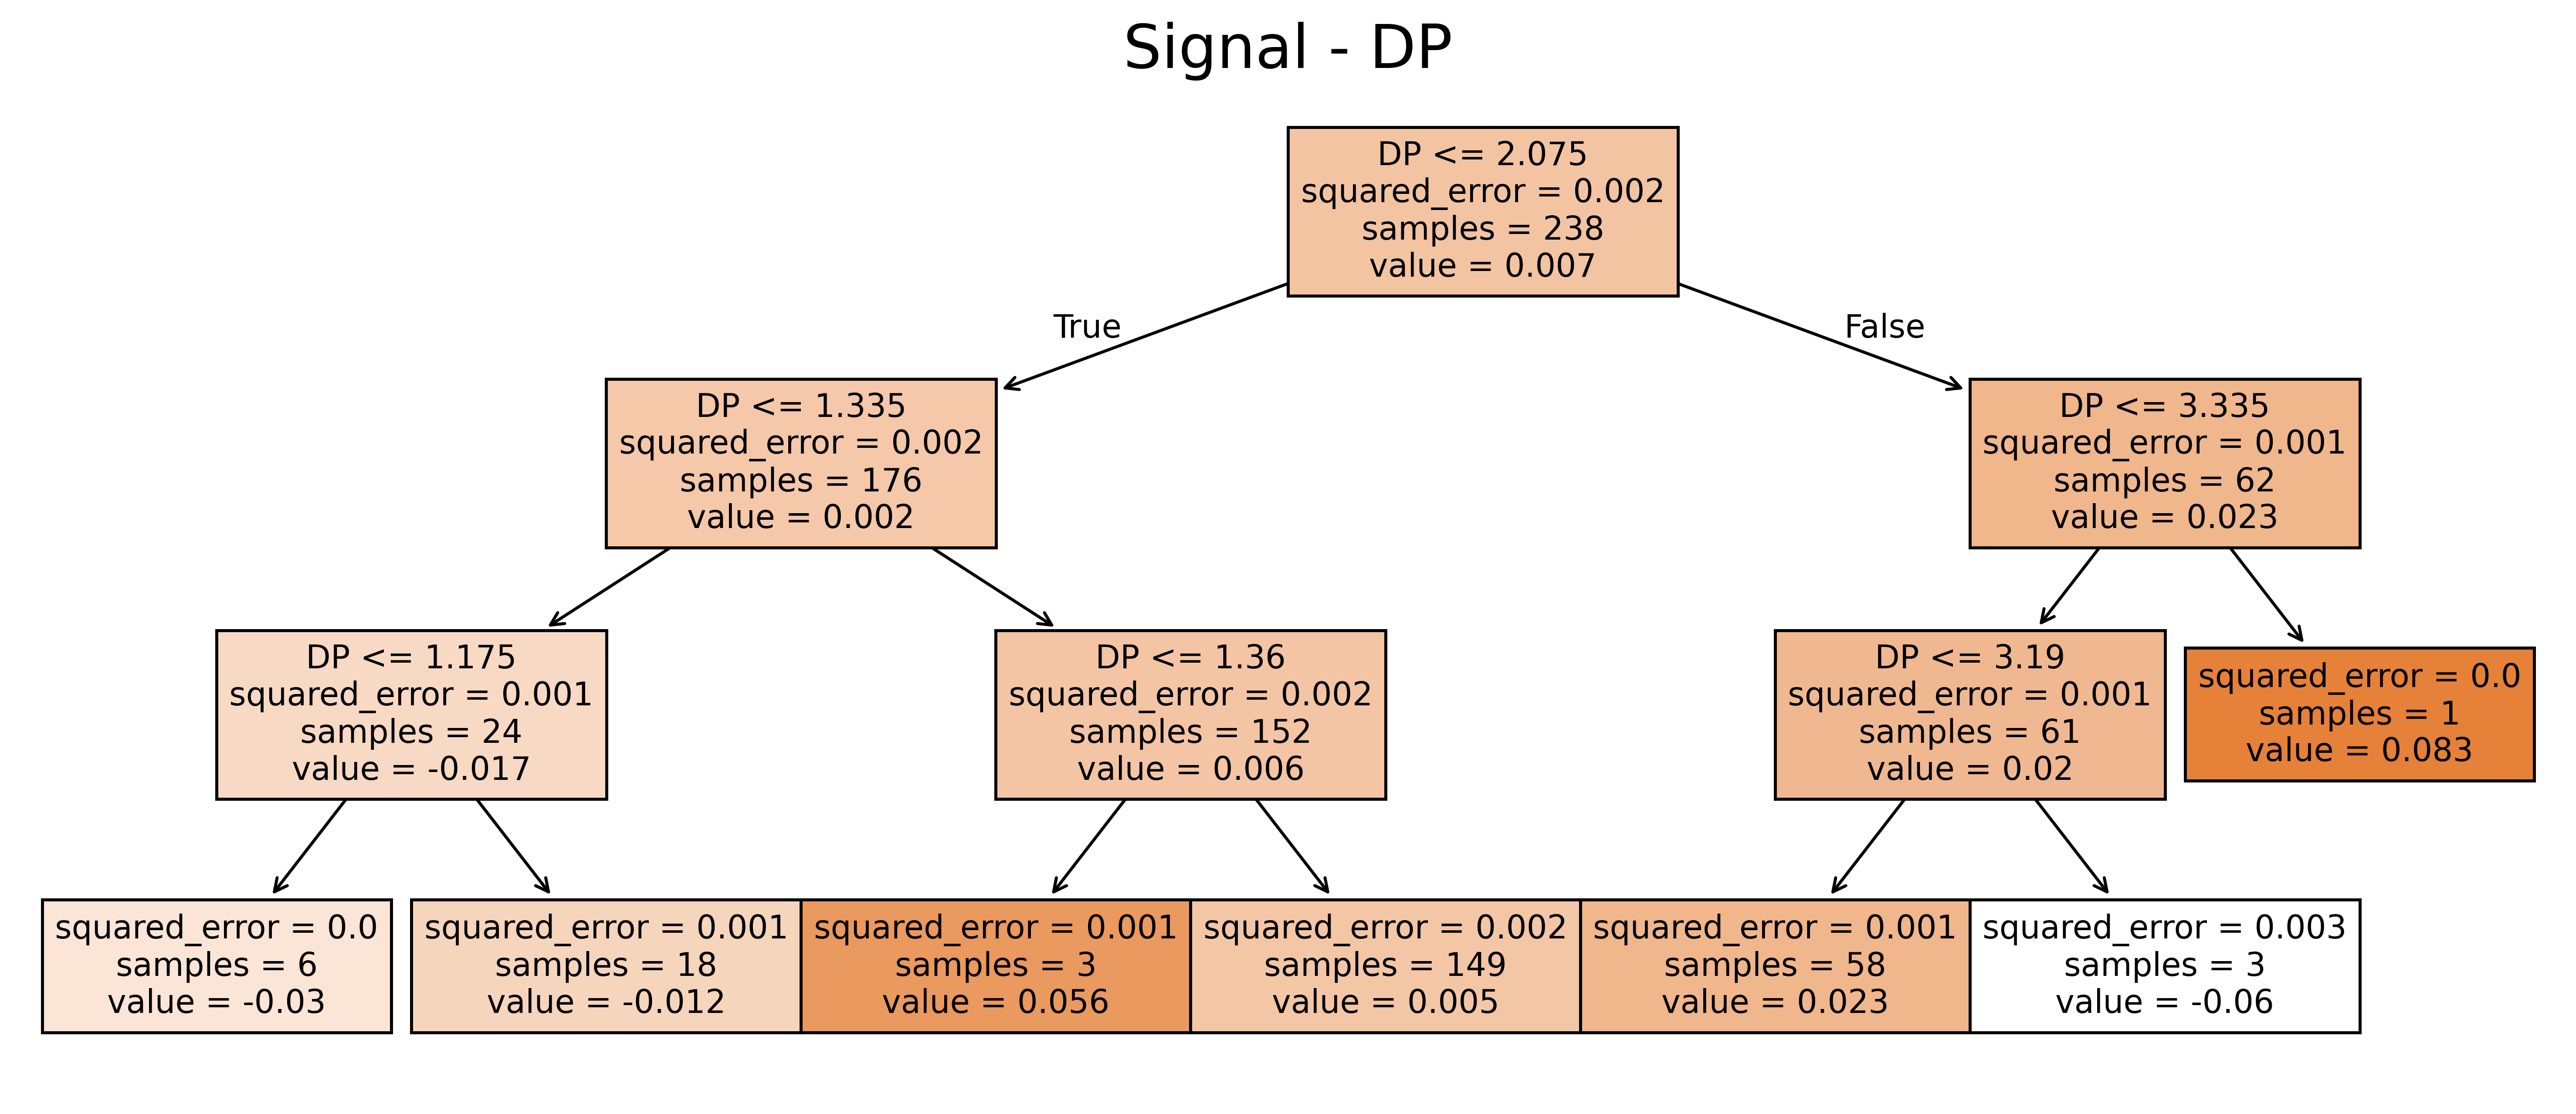

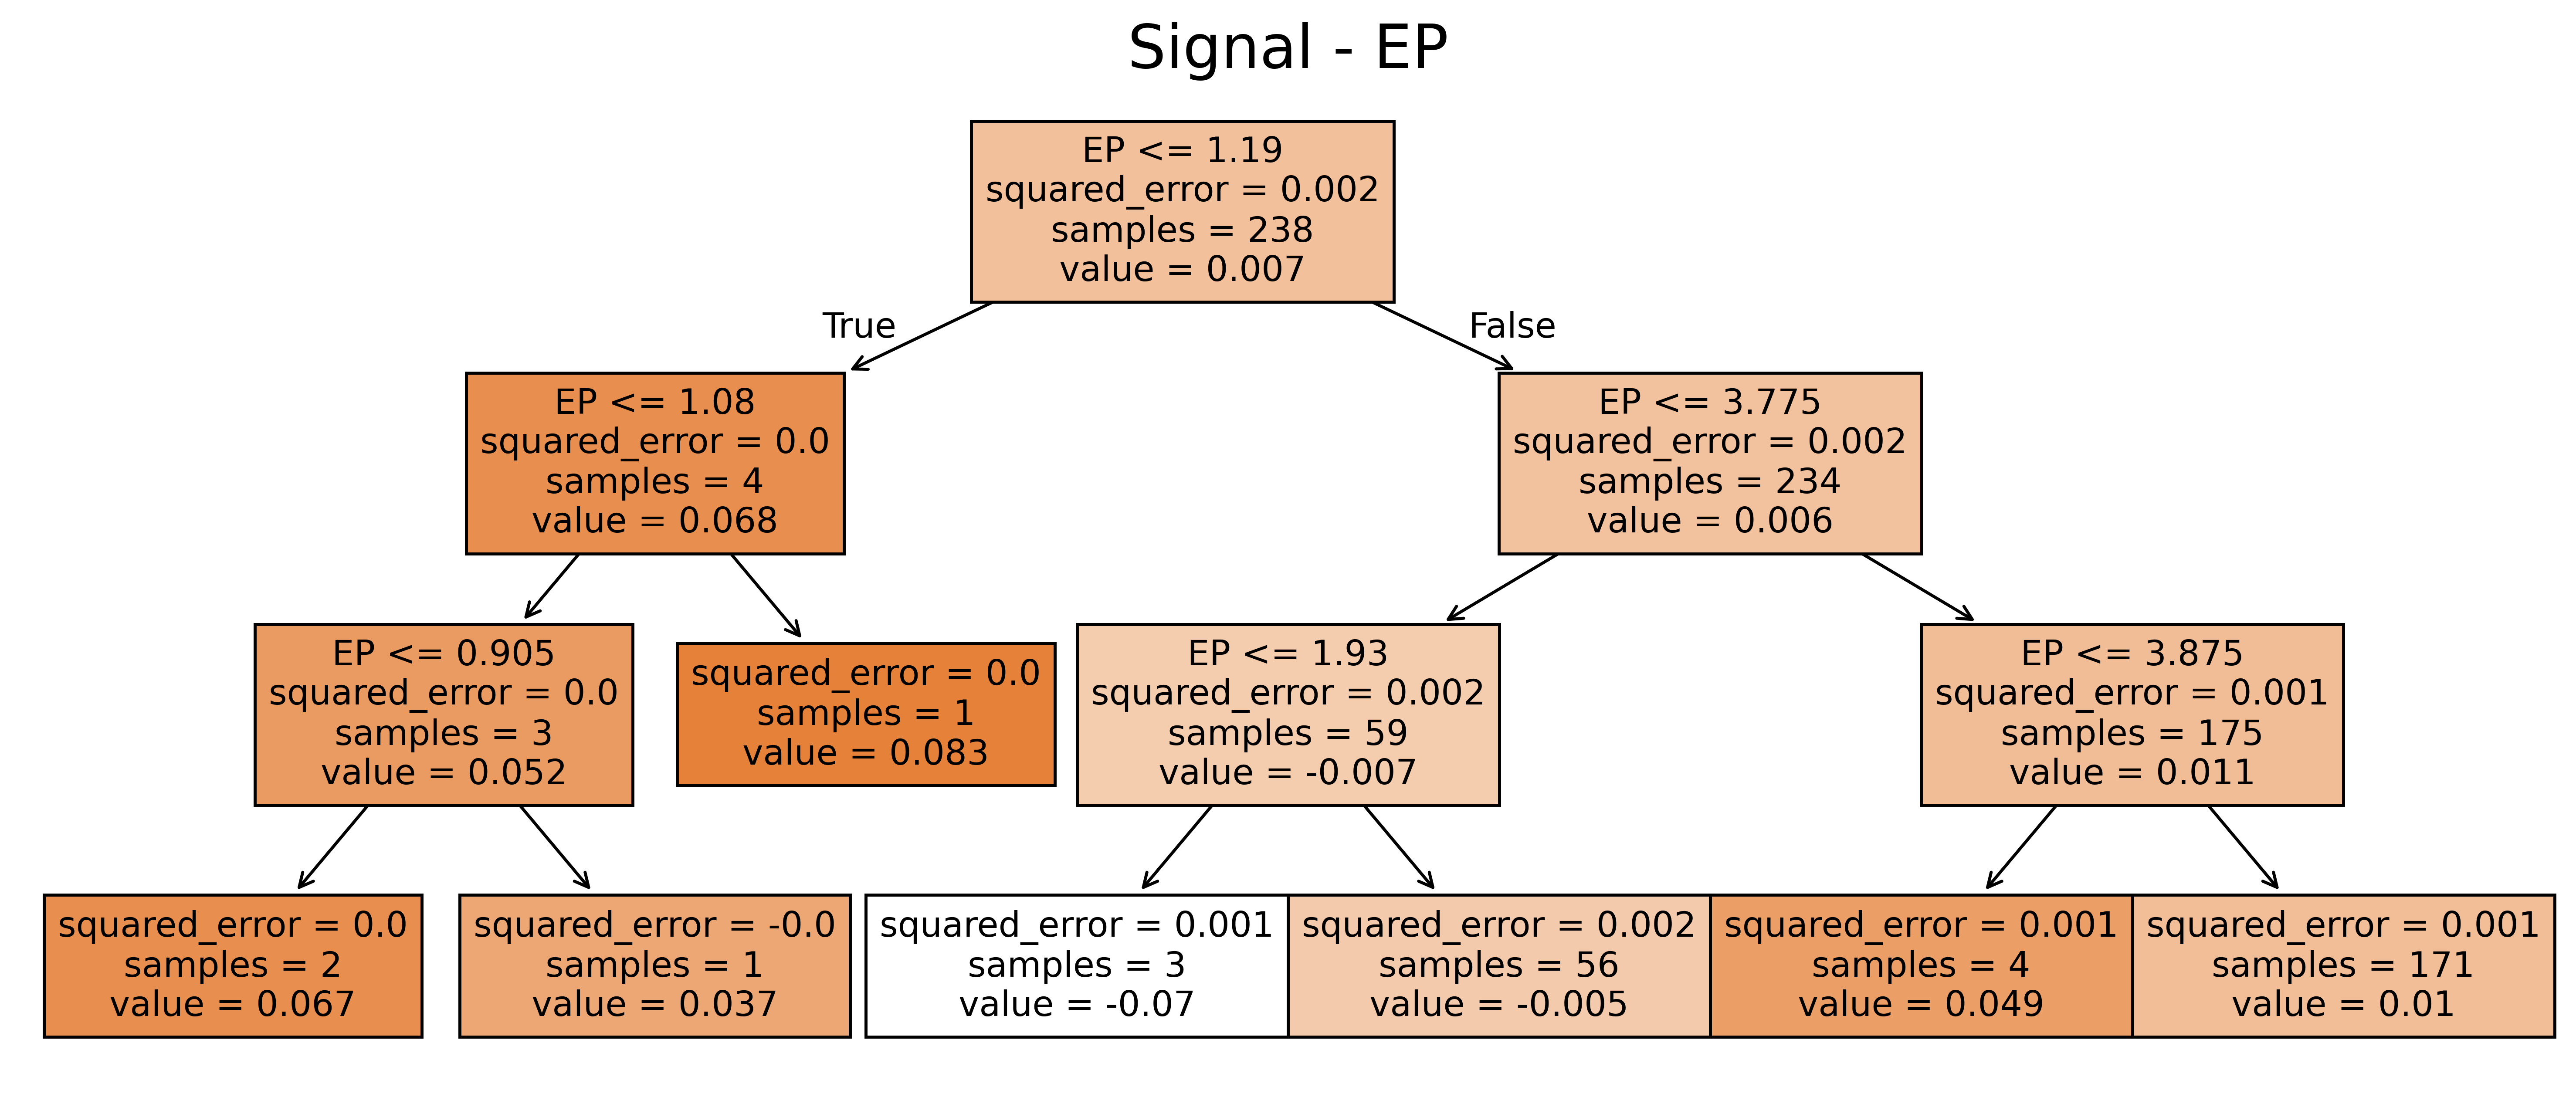

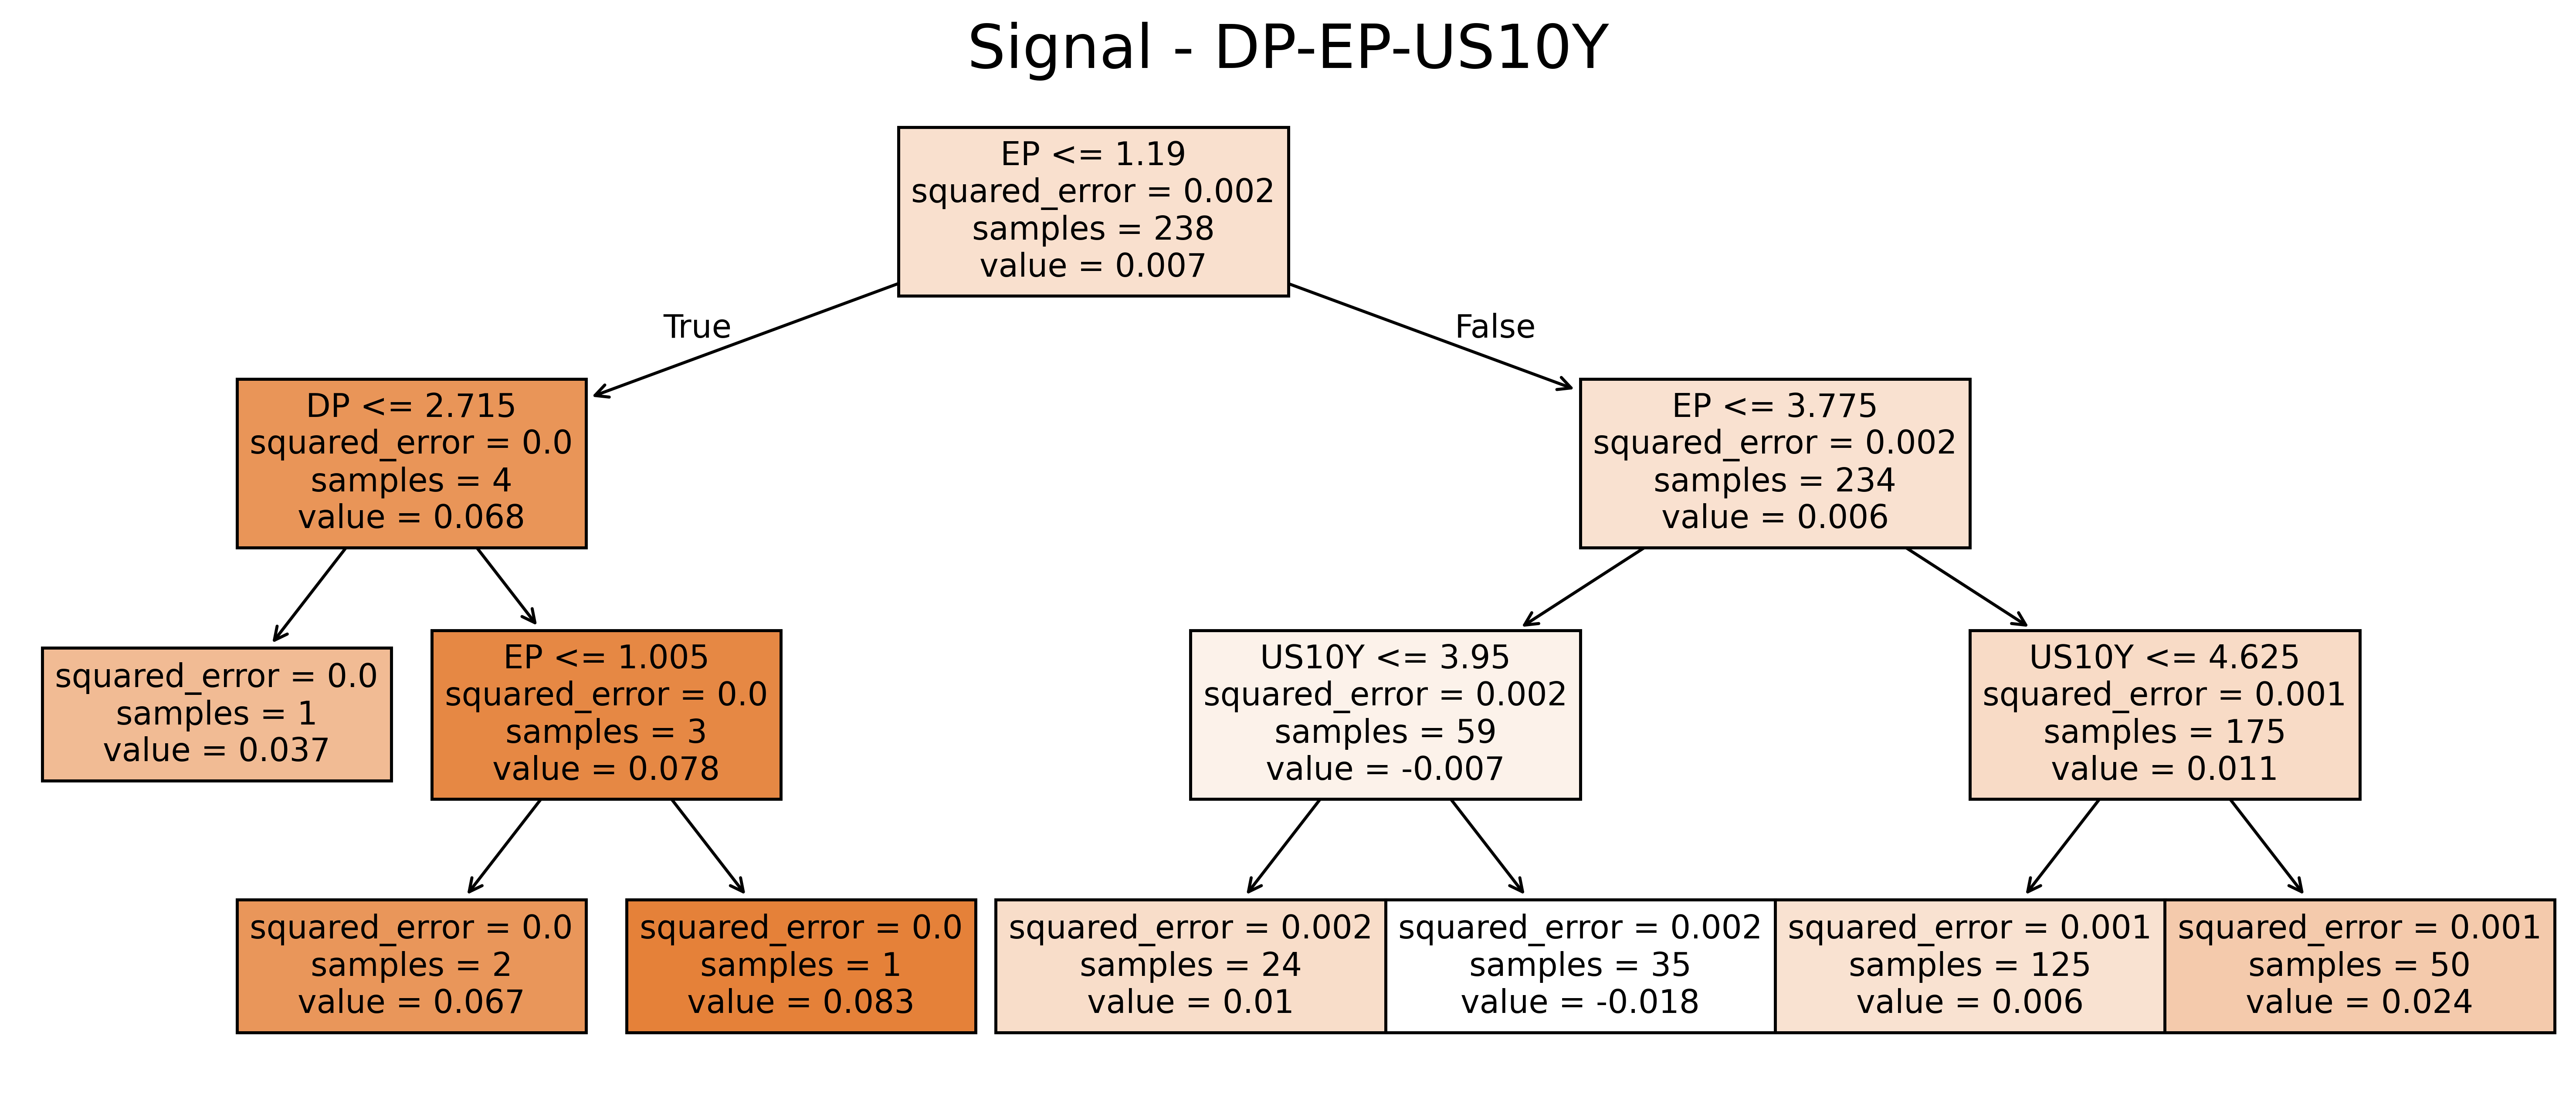

In [39]:
ML_forecast_DP = ml_model_predictions(['DP'], gmo_total_ret, gmo_signals, 'SPY', plots = True)
ML_forecast_EP = ml_model_predictions(['EP'], gmo_total_ret, gmo_signals, 'SPY', plots = True)
ML_forecast_All = ml_model_predictions(['DP','EP','US10Y'], gmo_total_ret, gmo_signals, 'SPY', plots = True)


### ML OOS Stats

In [40]:
def oos_ml_model_predictions(model_cols, returns, signals, return_col, window = 60):


    methods = ['OLS', 'Tree', 'NN']
    est = dict()

    forecasts_MLOOS = pd.DataFrame(columns=methods,index=returns.iloc[1:].index,dtype='float64')


    y = returns.loc[:,[return_col]].iloc[1:].squeeze('columns').ravel()
    Xlag = signals.loc[:,model_cols].shift(1).dropna()
    X = signals.loc[:,model_cols]

    for method in methods:

        for t in returns.iloc[1:].index[window-1:]:
            yt = returns.loc[:,[return_col]].iloc[1:].loc[:t].values.ravel()
            Xlag_t = Xlag.loc[:t,:].values
            x_t = X.loc[t,:].values.reshape(1,-1)

            if method == 'OLS':
                est = LinearRegression()
            elif method == 'Tree':
                est = RandomForestRegressor(max_depth=3,random_state=1)
            elif method == 'NN':
                est = MLPRegressor(hidden_layer_sizes=500,random_state=1)

            est.fit(Xlag_t,yt);
            predval = est.predict(x_t)[0]
            forecasts_MLOOS.loc[t,method] = predval

    forecasts_MLOOS.insert(0,'Mean', returns.loc[:,[return_col]].expanding().mean().shift(1).dropna())

    # prefer to date forecast by date of forecasted value, not date it was calculated
    forecasts_MLOOS = forecasts_MLOOS.shift(1).dropna()


    wts_MLOOS = 100 * forecasts_MLOOS

    spy_MLOOS, _ = returns.loc[:,[return_col]].iloc[1:].align(forecasts_MLOOS, join='right', axis=0)

    fund_returns_MLOOS = wts_MLOOS * spy_MLOOS.values
    fund_returns_MLOOS.insert(0,'Passive', spy_MLOOS)

    sigma_t = fund_returns_MLOOS.rolling(24).std()
    relative_vols = pd.DataFrame(sigma_t[['Passive']].to_numpy() / sigma_t.drop(columns=['Passive']).to_numpy(),columns=sigma_t.drop(columns=['Passive']).columns, index=sigma_t.index)
    wts_t = relative_vols * wts_MLOOS
    fund_returns_MLOOS = wts_t * spy_MLOOS.values
    fund_returns_MLOOS.insert(0,'Passive', spy_MLOOS)

    fund_returns_MLOOS.dropna(inplace=True)

    null = returns.loc[:,[return_col]].expanding(window+1).mean().shift(1).dropna() 
    actual = returns.loc[:,[return_col]].iloc[window+1:]

    forecast_err = pd.DataFrame()
    null_err = pd.DataFrame()
    for col in forecasts_MLOOS.columns:
        forecast_err[col] = forecasts_MLOOS[col] - actual[return_col]
        null_err[col] = null[return_col] - actual[return_col]
        
    oos_r2 = 1-(((forecast_err**2).sum())/(null_err**2).sum()).to_frame('OOS R-Squared')


    return (fund_returns_MLOOS,oos_r2)

In [41]:
ML_oos_forecast_DP = oos_ml_model_predictions(['DP'], gmo_total_ret, gmo_signals, 'SPY')
ML_oos_forecast_EP = oos_ml_model_predictions(['EP'], gmo_total_ret, gmo_signals, 'SPY')
ML_oos_forecast_All = oos_ml_model_predictions(['DP','EP','US10Y'], gmo_total_ret, gmo_signals, 'SPY')


In [42]:
oos_strats = {'DP': ML_oos_forecast_DP,
          'EP': ML_oos_forecast_EP,
          'All': ML_oos_forecast_All
         }
ml_oos_strat_summary = []
for k,v in oos_strats.items():
    strat_oos_r2 = oos_strats[k][1]
    strat_oos_r2['Model'] = k
    strat_oos_r2.index.name = 'Prediction Method'    
    ml_oos_strat_summary.append(strat_oos_r2.reset_index().set_index(['Model','Prediction Method']))
    

ml_oos_strat_summary_df = pd.concat(ml_oos_strat_summary)
ml_oos_strat_summary_df

OOS R-Squared
Model Prediction Method               
DP    Mean                   -0.000570
      OLS                    -0.003332
      Tree                   -0.109789
      NN                     -0.405961
EP    Mean                   -0.000570
      OLS                    -0.004874
      Tree                   -0.142852
      NN                     -0.314646
All   Mean                   -0.000570
      OLS                    -0.030870
      Tree                   -0.186780
      NN                     -0.546929

In [43]:
oos_strats = {'DP': ML_oos_forecast_DP,
          'EP': ML_oos_forecast_EP,
          'All': ML_oos_forecast_All
         }
ml_oos_strat_summary = []
for k,v in oos_strats.items():
    strat_oos = oos_strats[k][0]
    perf_summary = performance_summary(strat_oos)
    perf_summary['Model'] = k
    perf_summary.index.name = 'Prediction Method'
    ml_oos_strat_summary.append(perf_summary.reset_index().set_index(['Model','Prediction Method']))
    

ml_oos_strat_summary_df = pd.concat(ml_oos_strat_summary)
ml_oos_strat_summary_df

Mean  Volatility  Sharpe Ratio  Skewness  \
Model Prediction Method                                                 
DP    Passive            0.076556    0.153622      0.498342 -0.466465   
      Mean               0.077446    0.146542      0.528494 -0.448677   
      OLS                0.077699    0.144552      0.537512 -0.425347   
      Tree               0.046583    0.153615      0.303247 -0.641854   
      NN                 0.020770    0.146588      0.141688 -0.207237   
EP    Passive            0.076556    0.153622      0.498342 -0.466465   
      Mean               0.077446    0.146542      0.528494 -0.448677   
      OLS                0.091887    0.162944      0.563919  0.012314   
      Tree               0.049081    0.153222      0.320324 -0.272346   
      NN                -0.010736    0.158749     -0.067629 -0.227573   
All   Passive            0.076556    0.153622      0.498342 -0.466465   
      Mean               0.077446    0.146542      0.528494 -0.448677   
      OLS                0.100460    0.163563      0.614195  0.282291   
      Tree               0.015587    0.154782      0.100700 -1.303724   
      NN                -0.020185    0.171717     -0.117548 -0.570240   

                         Excess Kurtosis  VaR (0.05)  CVaR (0.05)       Min  \
Model Prediction Method                                                       
DP    Passive                   0.762167   -0.079097    -0.096554 -0.165187   
      Mean                      0.708965   -0.070346    -0.090066 -0.157938   
      OLS                       1.756473   -0.069443    -0.092896 -0.178187   
      Tree                      4.117672   -0.074135    -0.110873 -0.219626   
      NN                        0.770021   -0.074801    -0.095581 -0.119504   
EP    Passive                   0.762167   -0.079097    -0.096554 -0.165187   
      Mean                      0.708965   -0.070346    -0.090066 -0.157938   
      OLS                       3.118863   -0.071664    -0.105545 -0.162669   
      Tree                      5.743251   -0.070775    -0.113415 -0.212539   
      NN                        2.188962   -0.084222    -0.113414 -0.175895   
All   Passive                   0.762167   -0.079097    -0.096554 -0.165187   
      Mean                      0.708965   -0.070346    -0.090066 -0.157938   
      OLS                       3.979899   -0.068122    -0.103751 -0.175175   
      Tree                      7.772004   -0.076614    -0.125783 -0.262540   
      NN                        5.507607   -0.080287    -0.139953 -0.206185   

                              Max  Max Drawdown       Peak     Bottom  \
Model Prediction Method                                                 
DP    Passive            0.126984     -0.507980 2007-10-31 2009-02-28   
      Mean               0.125081     -0.472397 2007-10-31 2009-02-28   
      OLS                0.158754     -0.523439 2007-10-31 2009-02-28   
      Tree               0.201013     -0.480150 2001-01-31 2011-09-30   
      NN                 0.153155     -0.504001 2007-10-31 2012-02-29   
EP    Passive            0.126984     -0.507980 2007-10-31 2009-02-28   
      Mean               0.125081     -0.472397 2007-10-31 2009-02-28   
      OLS                0.191997     -0.447694 2009-02-28 2010-06-30   
      Tree               0.214520     -0.346132 2007-10-31 2008-12-31   
      NN                 0.163318     -0.674842 2002-09-30 2021-12-31   
All   Passive            0.126984     -0.507980 2007-10-31 2009-02-28   
      Mean               0.125081     -0.472397 2007-10-31 2009-02-28   
      OLS                0.219717     -0.440702 2009-02-28 2011-09-30   
      Tree               0.205933     -0.483884 2000-07-31 2002-10-31   
      NN                 0.245224     -0.732606 2000-08-31 2011-10-31   

                          Recovery  
Model Prediction Method             
DP    Passive           2012-03-31  
      Mean              2012-08-31  
      OLS               2013-03-31  
      Tree      